In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install facenet-pytorch

     |████████████████████████████████| 1.9 MB 4.4 MB/s 


In [3]:
import sys
import glob
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import itertools
from torch import optim
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torch.autograd.variable import Variable
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import LambdaLR
from PIL import Image
import cv2
from facenet_pytorch import MTCNN, InceptionResnetV1

In [4]:
# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [27]:
 class CustomDataset(Dataset):
    def __init__(self,pathsA, pathsB):
        self.pathsA = pathsA
        self.pathsB = pathsB   
        self.transforms = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])
     
    def __getitem__(self, index):
        imageA = Image.open(self.pathsA[index%len(self.pathsA)])
        imageA = imageA.resize((256,256),Image.LANCZOS)
        t_imageA = self.transforms(imageA)
        print(t_imageA.shape)
        
        imageB = Image.open(self.pathsB[index%len(self.pathsB)])
        imageB = imageB.resize((256,256),Image.LANCZOS)
        #print(imageB.size)
        t_imageB = self.transforms(imageB)
        print(t_imageB.shape)
        return t_imageA, t_imageB

    def __len__(self):
        
        return max(len(self.pathsA),len(self.pathsB))

In [29]:
transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])

In [31]:
x = Image.open("./train_A/0.png")
x = x.resize((256,256),Image.LANCZOS)
t_x = transform(x)
print(t_x.shape)

torch.Size([3, 256, 256])


In [32]:
img_embedding = resnet(t_x.unsqueeze(0))

In [6]:
!cp -r /content/drive/Shareddrives/AML_Project/data/train_X ./train_A
!cp -r /content/drive/Shareddrives/AML_Project/data/train_Y ./train_B

In [7]:
path_trainA = glob.glob("./train_A/*.png")
path_trainB = glob.glob("./train_B/*.jpg")

In [28]:
dataset_train = CustomDataset(path_trainA,path_trainB)
print(len(dataset_train))
loader_train = DataLoader(dataset_train,batch_size=1,shuffle=False)

1000


In [9]:
test = next(iter(loader_train))

In [10]:
print(type(test))

<class 'list'>


In [11]:
print(len(test))

2


In [12]:
print(type(test[0]))

<class 'torch.Tensor'>


In [13]:
print(test[0].shape)

torch.Size([1, 3, 256, 256])


torch.Size([256, 256, 3])


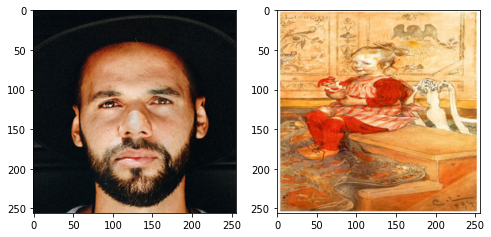

In [14]:
testA = test[0]#.to(device)
testB = test[1]#.to(device)
h_z = [testA,testB]
print(test[0][0].permute(1,2,0).size())
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows+1):
    img = h_z[i-1][0].permute(1,2,0)
    fig.add_subplot(rows, columns, i)
    plt.imshow((img+1.)/2.)
plt.show()

In [15]:
img_embedding = resnet(test[0])

In [22]:
img_embedding = resnet(test[1])

In [33]:
print(type(img_embedding))

<class 'torch.Tensor'>


In [34]:
print(img_embedding.shape)

torch.Size([1, 512])


In [19]:
from facenet_pytorch import MTCNN

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [20]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [21]:
img_aligned, prob = mtcnn(test[0], return_prob=True)

NotImplementedError: ignored